In [4]:
import cv2
import matplotlib.pyplot as plt

## Application: Sheet Music Reader 
Suppose you wanted to build an application that could read (decode) sheet music. This is similar to 
Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding 
techniques. Let's take a look at an example.

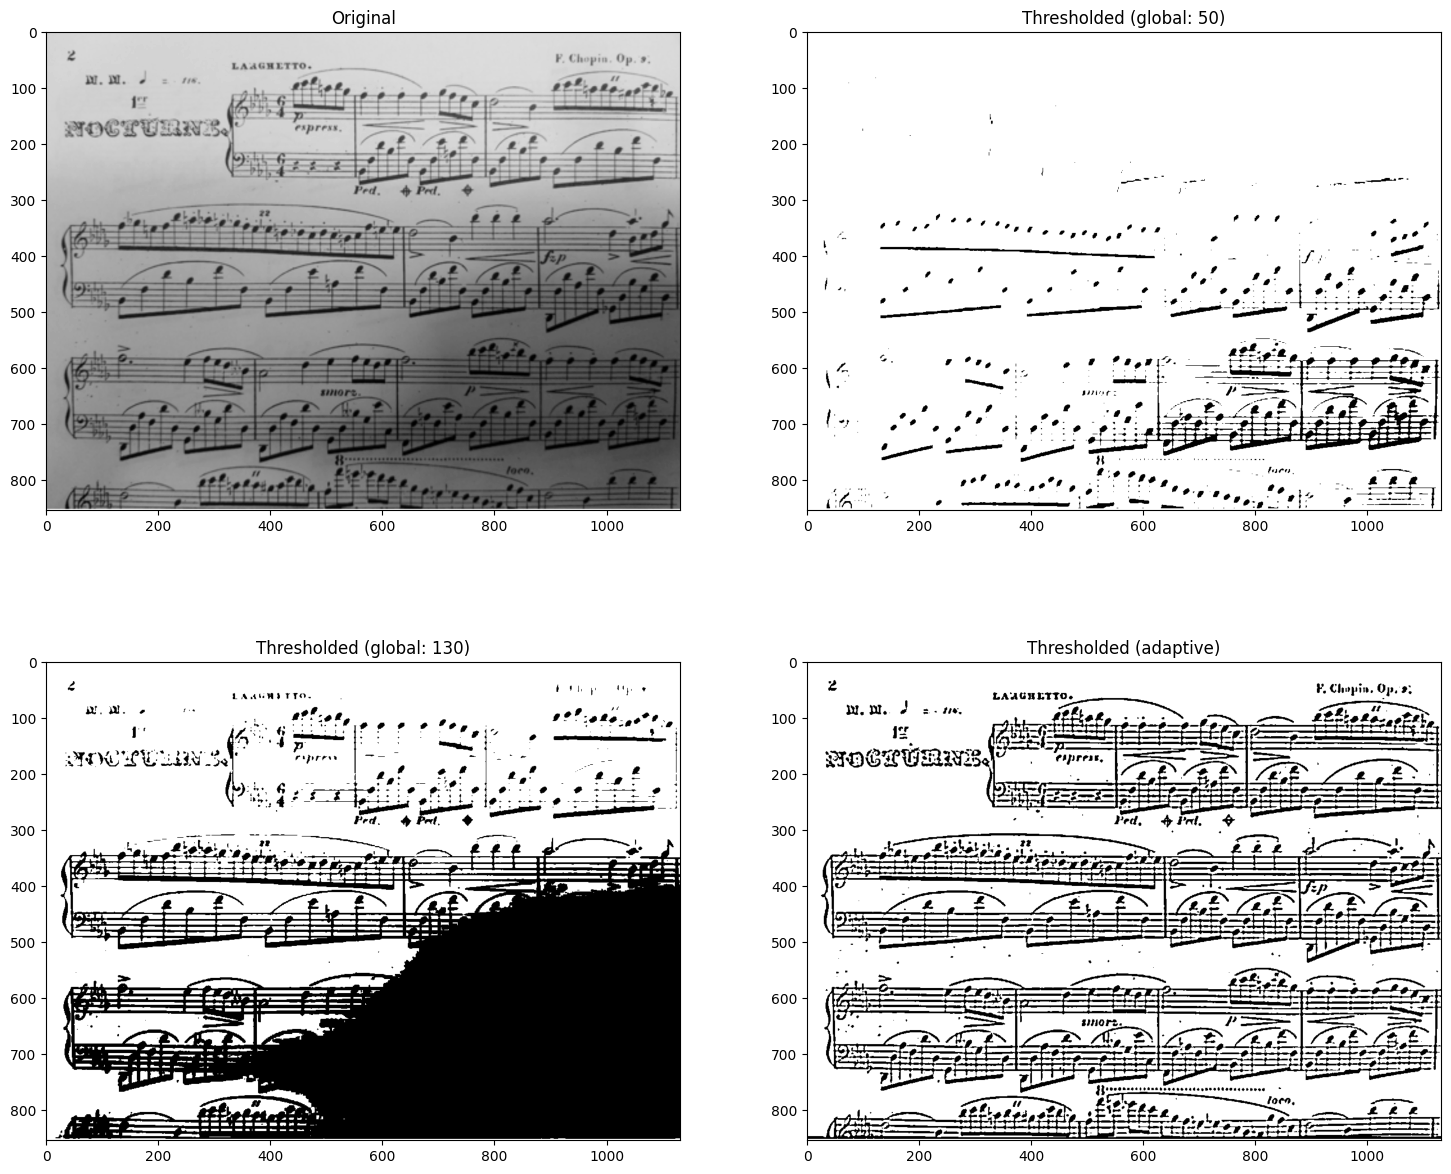

In [6]:
img = cv2.imread("images/Piano_Sheet_Music.png",0)


# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img,50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img,130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");


## Bitwise operation

First 10 bit of img rec: [255 255 255 255 255 255 255 255 255 255]
First 10 bit of img cir: [0 0 0 0 0 0 0 0 0 0]


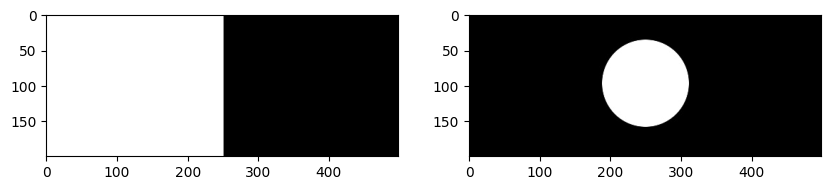

In [13]:
img_rec = cv2.imread("images/rectangle.jpg",0)
img_cir = cv2.imread("images/circle.jpg",0)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1);plt.imshow(img_rec,cmap="gray");
plt.subplot(1,2,2);plt.imshow(img_cir,cmap="gray");

print(f"First 10 bit of img rec: {img_rec[0][0:10]}")
print(f"First 10 bit of img cir: {img_cir[0][0:10]}")

Text(0.5, 1.0, 'Bitwise NOT from REC')

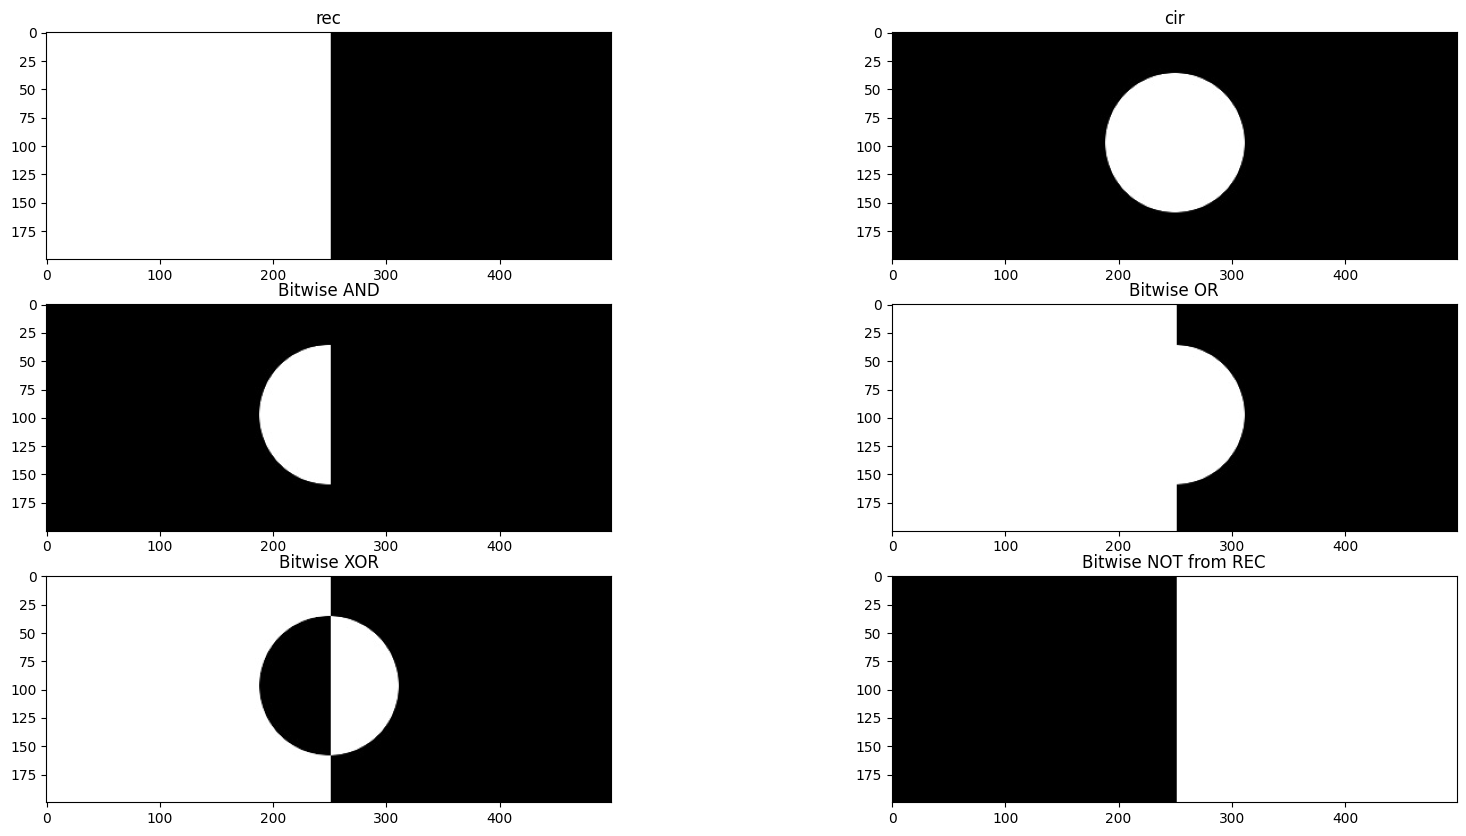

In [41]:
bitwise_and = cv2.bitwise_and(img_rec, img_cir)
bitwise_or = cv2.bitwise_or(img_rec, img_cir)
bitwise_xor = cv2.bitwise_xor(img_rec, img_cir)
bitwise_not = cv2.bitwise_not(img_rec)

plt.figure(figsize=(20,10));
plt.subplot(3,2,1);plt.imshow(img_rec,cmap="gray");plt.title("rec")
plt.subplot(3,2,2);plt.imshow(img_cir,cmap="gray");plt.title("cir")
plt.subplot(3,2,3);plt.imshow(bitwise_and, cmap="gray");plt.title("Bitwise AND")
plt.subplot(3,2,4);plt.imshow(bitwise_or, cmap="gray");plt.title("Bitwise OR")
plt.subplot(3,2,5);plt.imshow(bitwise_xor, cmap="gray");plt.title("Bitwise XOR")
plt.subplot(3,2,6);plt.imshow(bitwise_not, cmap="gray");plt.title("Bitwise NOT from REC")

## Logo Manipulation

Shape of cola img: (700, 700, 3)
Shape of background img: (1800, 1800, 3)
Aspect ratio: 0.3888888888888889
Dimension: (700, 700)
Shape of background after resized: (700, 700, 3)


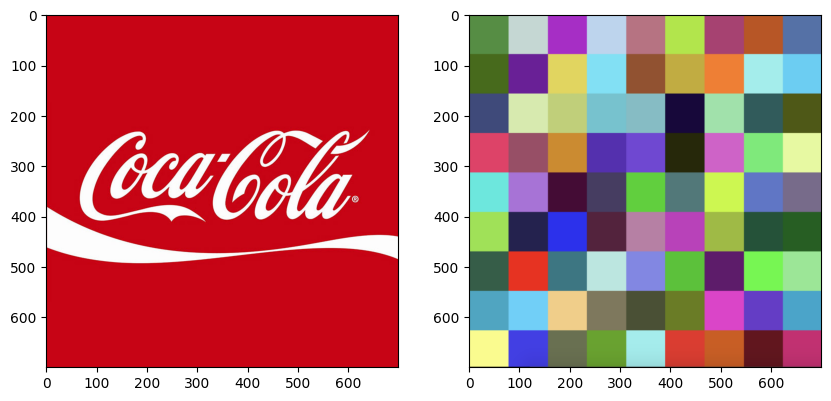

In [37]:
img_cola = cv2.imread("images/coca-cola-logo.png",1)
img_cola = cv2.cvtColor(img_cola, cv2.COLOR_BGR2RGB)

img_bg = cv2.imread("images/checkerboard_color.png",1)
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)

aspect_ratio = img_cola.shape[0] / img_bg.shape[0]
dim = (img_cola.shape[0], int(img_bg.shape[0] * aspect_ratio))


print(f"Shape of cola img: {img_cola.shape}")
print(f"Shape of background img: {img_bg.shape}")
print(f"Aspect ratio: {aspect_ratio}\nDimension: {dim}")

img_bg = cv2.resize(img_bg, dim, interpolation=cv2.INTER_AREA)

print(f"Shape of background after resized: {img_bg.shape}")

plt.figure(figsize=(10,10))
plt.subplot(1,2,1);plt.imshow(img_cola);
plt.subplot(1,2,2);plt.imshow(img_bg)

Img Cola Gray: [64 64 64 64 64 64 64 64 64 64]
Thresholded Gray Img: [0 0 0 0 0 0 0 0 0 0]


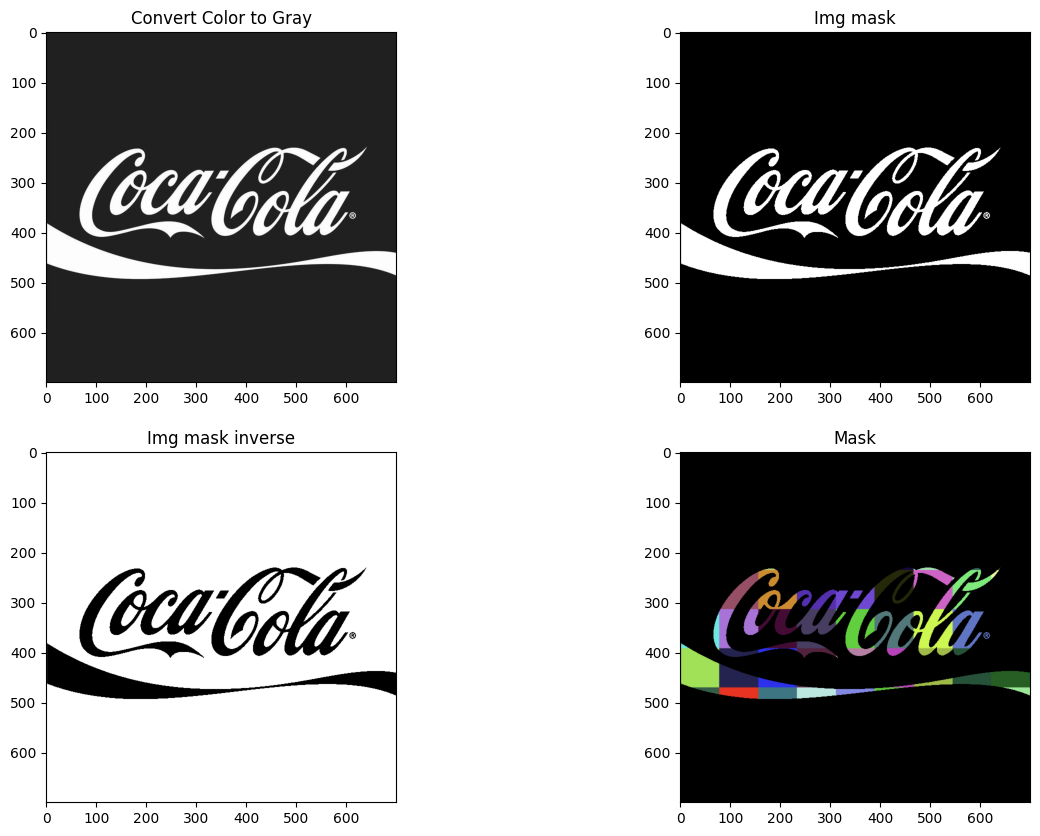

In [64]:
img_cola_gray = cv2.cvtColor(img_cola, cv2.COLOR_RGB2GRAY)
retval, img_mask = cv2.threshold(img_cola_gray, 127, 255, cv2.THRESH_BINARY)
img_mask_inv = cv2.bitwise_not(img_mask)
img_cola_w_mask = cv2.bitwise_and(img_bg, img_bg, mask=img_mask)
print(f"Img Cola Gray: {img_cola_gray[0][0:10]}")
print(f"Thresholded Gray Img: {img_mask[0][0:10]}")

plt.figure(figsize=(15,10));
plt.subplot(2,2,1);plt.imshow(img_cola_gray,cmap="gray");plt.title("Convert Color to Gray");
plt.subplot(2,2,2);plt.imshow(img_mask,cmap="gray");plt.title("Img mask");
plt.subplot(2,2,3);plt.imshow(img_mask_inv, cmap="gray");plt.title("Img mask inverse");
plt.subplot(2,2,4);plt.imshow(img_cola_w_mask,cmap="gray");plt.title("Mask");


### Isolate foreground from image

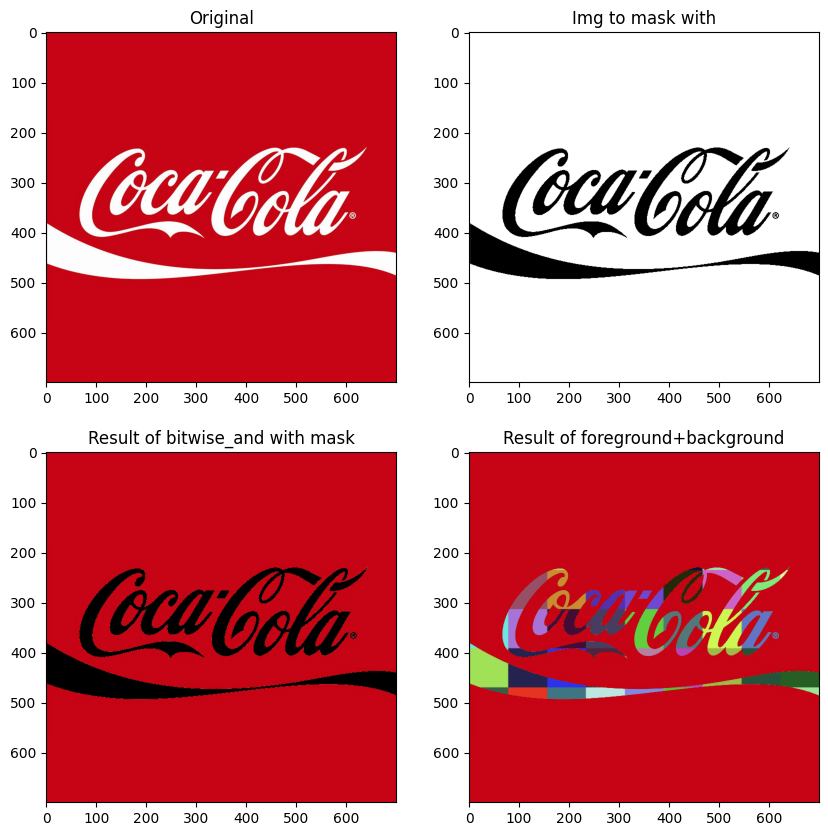

In [65]:
img_foreground = cv2.bitwise_and(img_cola, img_cola, mask=img_mask_inv)
result = cv2.add(img_foreground, img_cola_w_mask)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1);plt.imshow(img_cola);plt.title("Original");
plt.subplot(2,2,2);plt.imshow(img_mask_inv,cmap="gray");plt.title("Img to mask with");
plt.subplot(2,2,3);plt.imshow(img_foreground);plt.title("Result of bitwise_and with mask");
plt.subplot(2,2,4);plt.imshow(result);plt.title("Result of foreground+background");